In [1]:
print("Breast Cancer Prediction Project")

Breast Cancer Prediction Project


Loading Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

#Reading the file "breast-cancer.csv" 
df = pd.read_csv('breast-cancer.csv',index_col=False)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#check for the missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

In [6]:
#save the cleaner version of data
df.to_csv('data.csv',index=False)

EDA

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing

In [7]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#using clean data
df= pd.read_csv('data.csv',index_col=False)
df.drop('Unnamed:0',axis=1,inplace=True)
df.head(3)

KeyError: "['Unnamed:0'] not found in axis"

In [13]:
#basic descriptive statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
#calculates the skewness of each numeric column in the DataFrame 
df.skew(numeric_only=True)

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

 From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

In [15]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [16]:
#Group by daqnosis and review the output
diag_gr = df.groupby('diagnosis',axis=0)
pd.DataFrame(diag_gr.size(),columns=['Observations'])

,Observations
diagnosis,
B,357
M,212


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where

Malignant = 1 (indicates prescence of cancer cells)
Benign = 0 (indicates abscence)

Observation:
357 observation indicating presence of cancer cells and 212 show the absence of  cancer cell

2.3 Unimodal Data Visualizations


One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.

Histograms.

Density Plots.

Box and Whisker Plots.

In [17]:
#frequecnce of cancer diagnosis
sns.set_style('whitegrid')
sns.set_context({'figure.figsize':(10,8)})
sns.countplot(df['diagnosis'],label='Count',palette="Set3")

ValueError: could not convert string to float: 'M'

2.3.1 Visualise distribution of data via histograms

In [18]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,and __worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on

df_id_diag =df.loc[:,['id','diagnosis']]
df_diag = df.loc[:,['diagnosis']]

#For merge + slice
df_mean =df.iloc[:,1:11]
df_se =df.iloc[:,11:22]
df_worst = df.iloc[:,23:]
print(df_id_diag.columns)

Index(['id', 'diagnosis'], dtype='object')


In [19]:
print(df_mean.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')


In [20]:
print(df_se.columns)

Index(['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


Histogram the _mean suffix designition

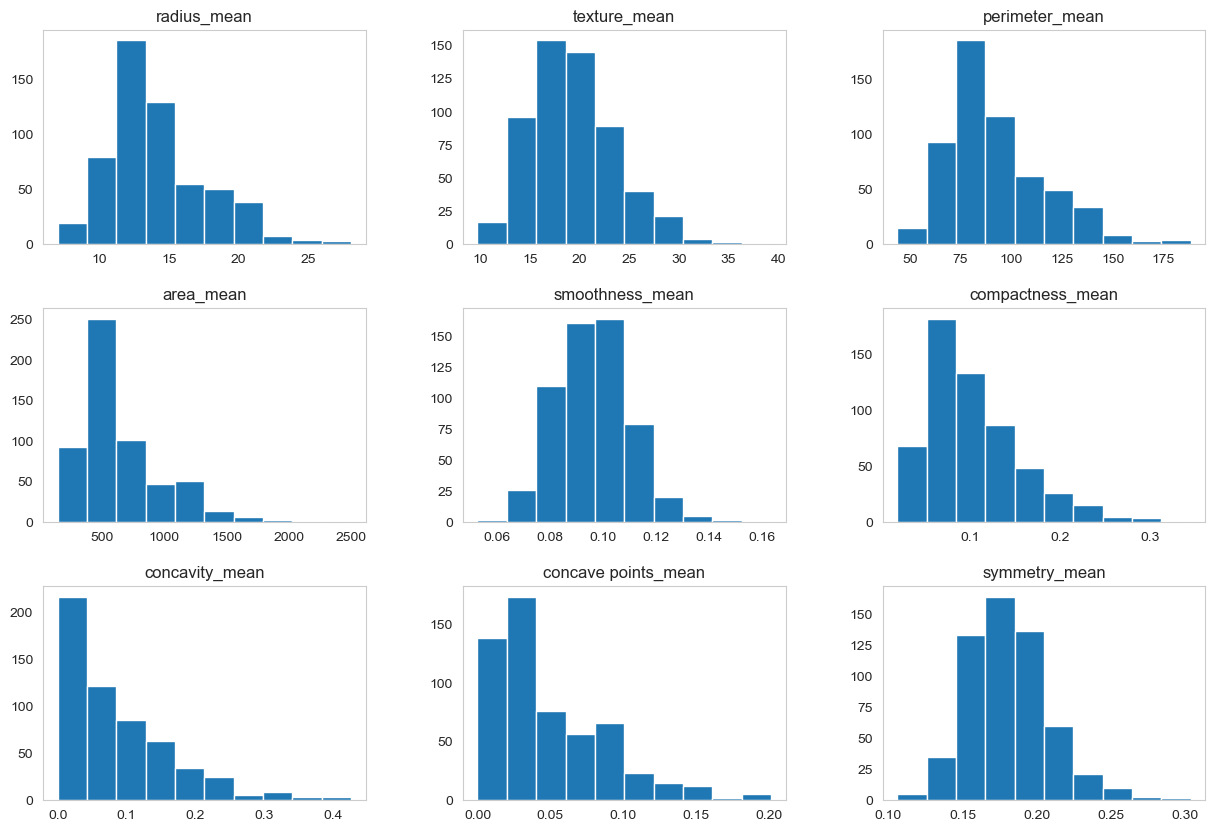

In [21]:
#plot histogram for CUT1 variables
hist_mean =df_mean.hist(bins=10, figsize=(15,10), grid=False)

Histogram for the _se suffix designition

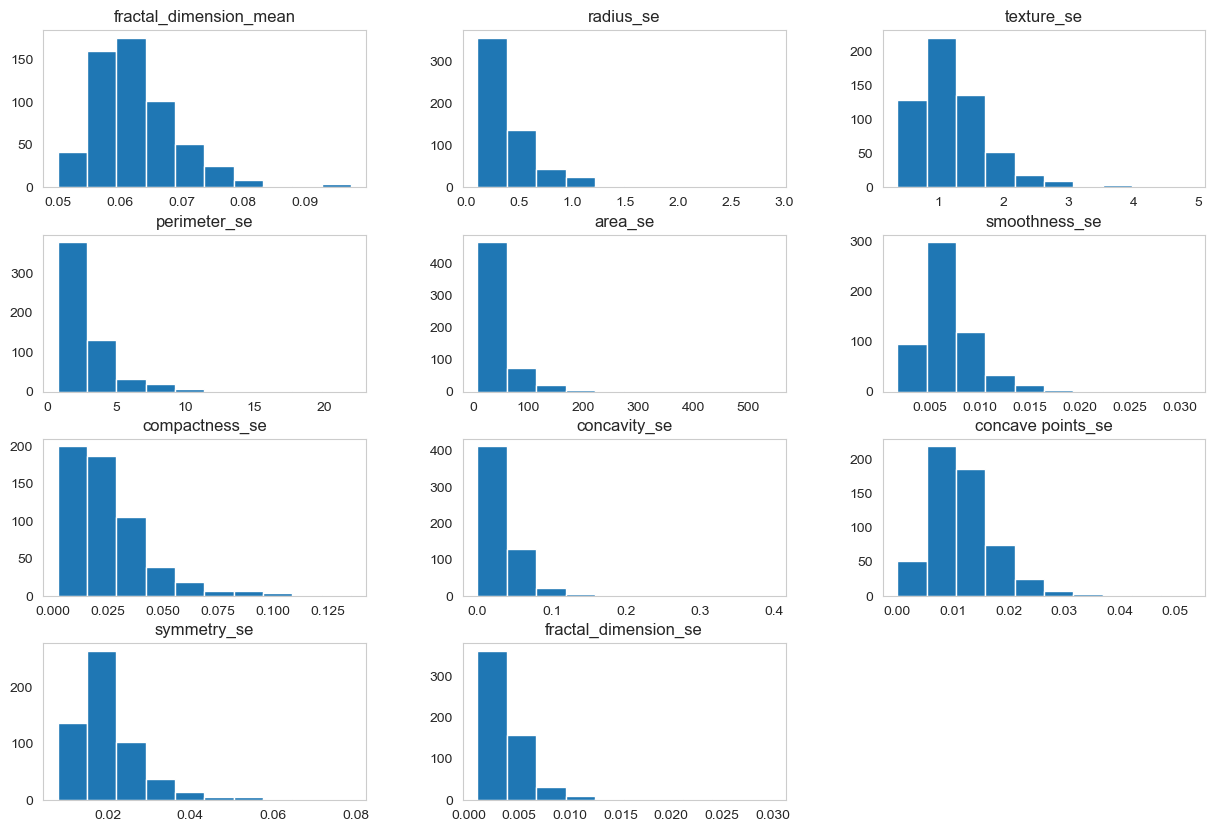

In [22]:
hist_se = df_se.hist(bins=10,figsize=(15,10),grid=False)

Histogram _worst suffix designition

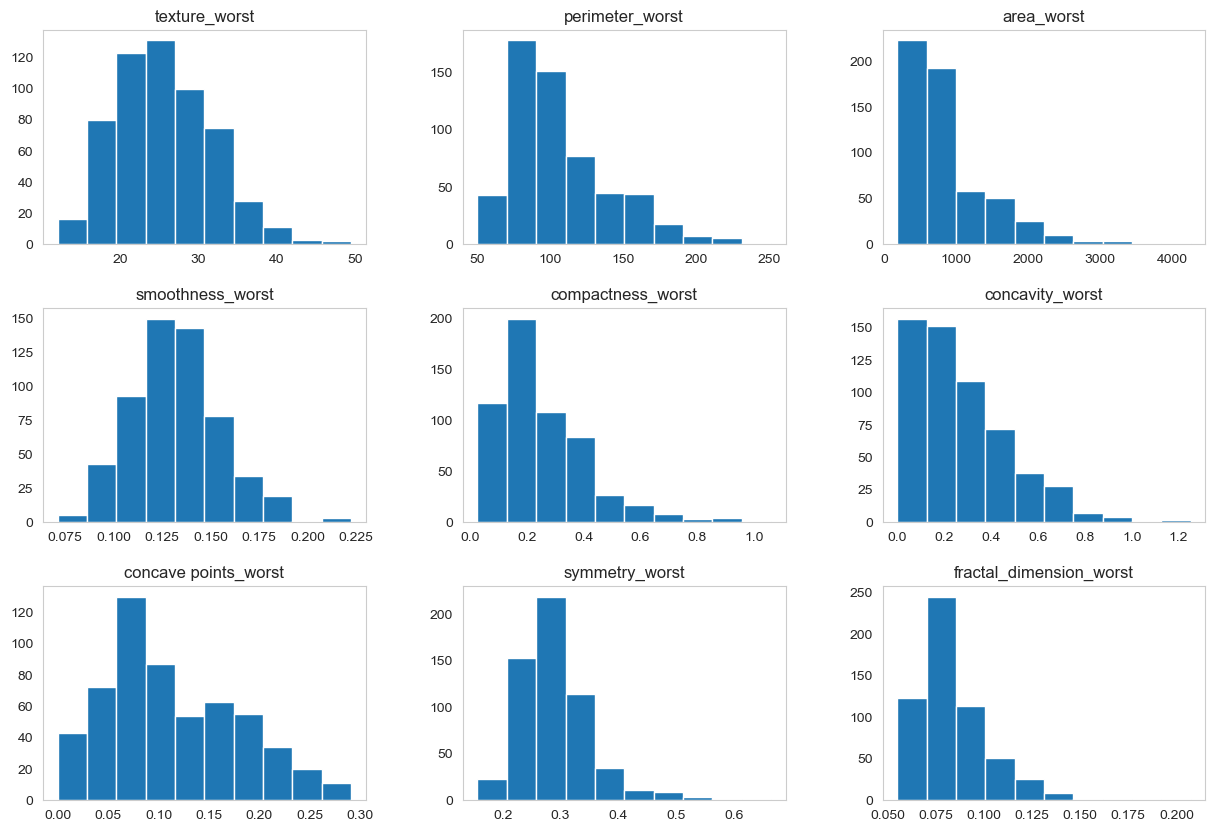

In [23]:
hist_worst = df_worst.hist(bins=10,figsize=(15,10),grid=False)

2.3.2 Visualize distribution of data via density plots

Density plots _mean suffix designition

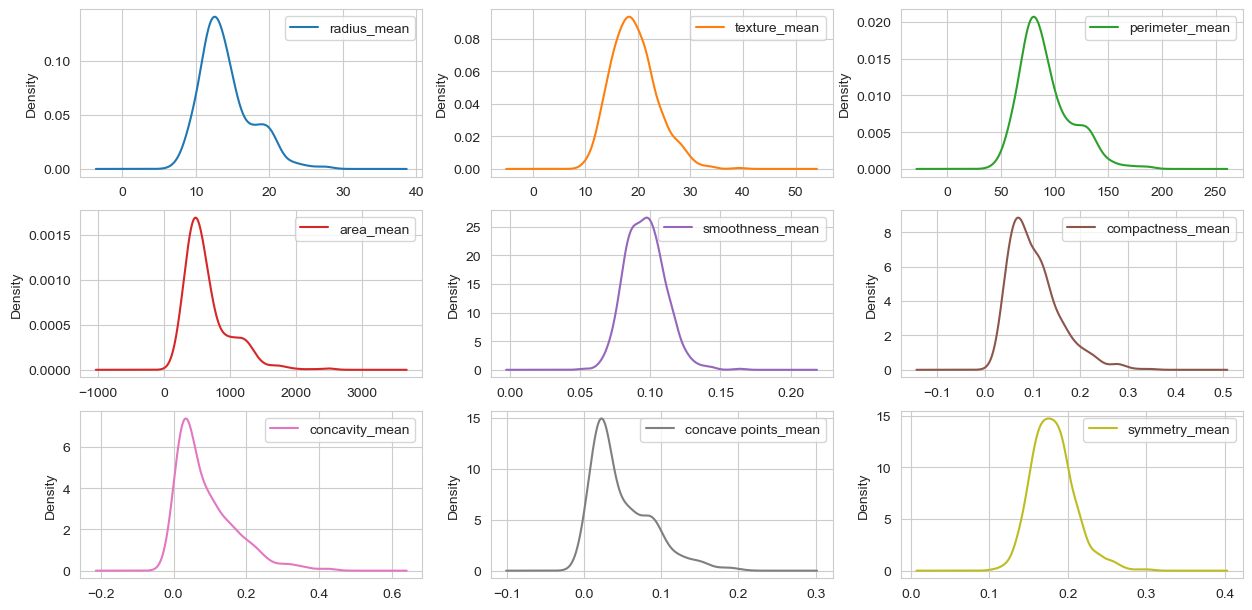

In [24]:
#density plots
plt= df_mean.plot(kind='density',subplots=True, layout=(4,3),sharex=False,sharey=False,figsize=(15,10))

Density plots _se suffix designition

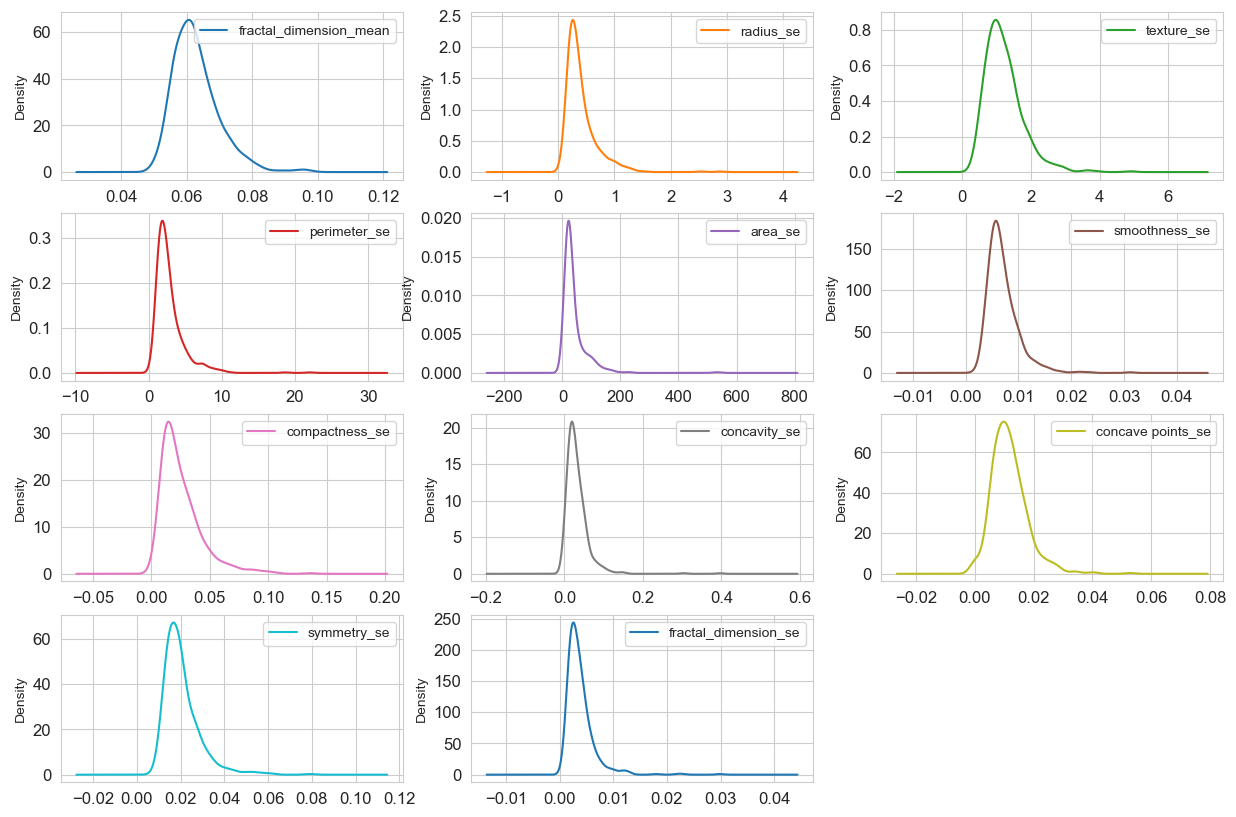

In [25]:
#density plot
plt = df_se.plot(kind='density', subplots=True, layout=(4,3),sharex=False,sharey=False, figsize=(15,10), fontsize=12)

Density plot _worst suffix designition

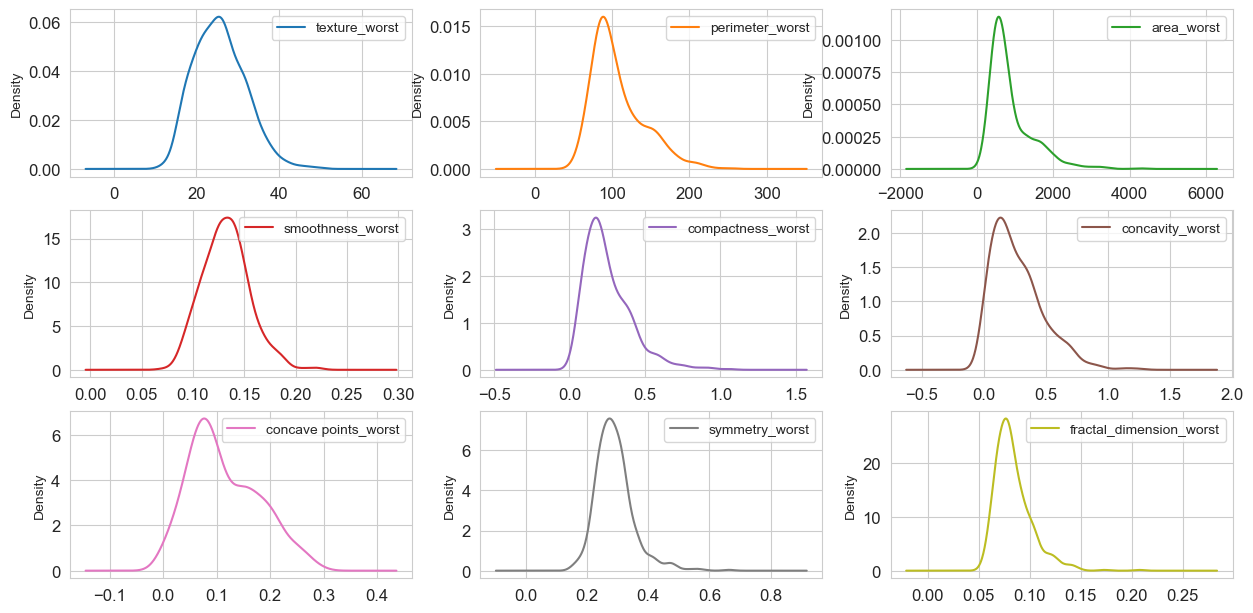

In [26]:
#density plots
plt = df_worst.plot(kind='density', subplots=True, layout=(4,3),sharex=False, sharey=False, figsize=(15,10), fontsize=12)

Observation

We can see that perhaps the attributes perimeter,radius, area, concavity, compactness may have an exponential distribution( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

2.3.3 Visualise distribution of data via box plots

Box plot _mean suffix designition

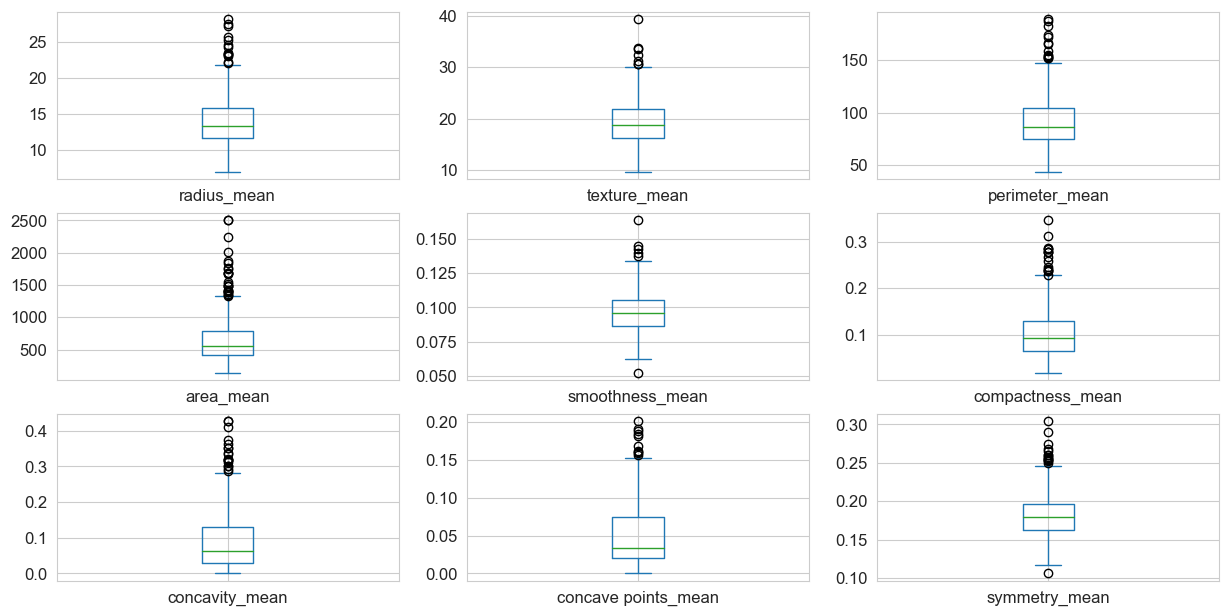

In [27]:
#box and wisker plots
plt = df_mean.plot(kind='box', subplots=True, layout=(4,3),sharex=False, sharey=False, figsize=(15,10), fontsize=12)

Box plot _se suffix designition

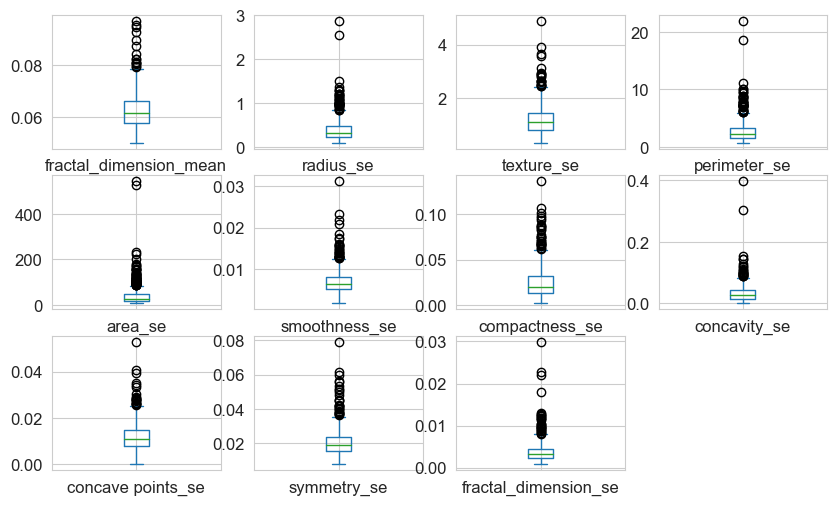

In [28]:
plt= df_se.plot(kind='box', subplots=True, layout=(4,4),sharex=False, sharey=False, fontsize=12)


Box plot _worst suffix designition

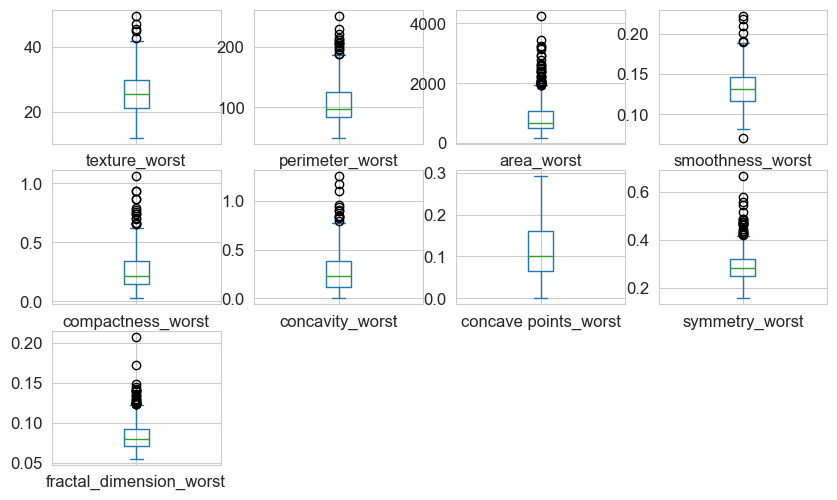

In [29]:
plt = df_worst.plot(kind='box', subplots=True, layout=(4,4),sharex=False, sharey=False, fontsize=12)

We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution( ).

2.4 Multimodal Data Visualizations

Scatter plots

Correlation matrix

<Axes: title={'center': 'Breast Cancer Feature Correlation Matrix'}>

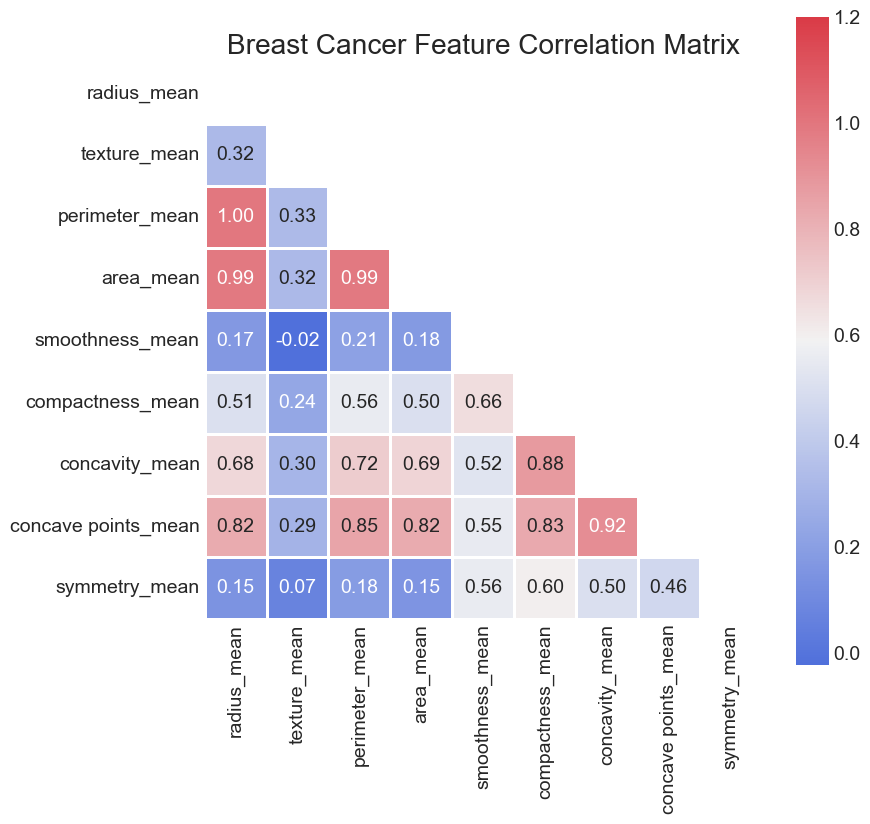

In [34]:
#plost correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight') 
sns.set_style("white")

df= pd.read_csv('data.csv',index_col=False)
# df.drop('Unnamed:0',axis=1,inplace=True)

# Select only numeric columns
numeric_df = df_mean.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric columns
corr = numeric_df.corr()

#Generate a mask for the upper triangle
mask= np.zeros_like(corr,dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#setup the matplotlib figure
df,ax = plt.subplots(figsize=(8,8))
plt.title("Breast Cancer Feature Correlation Matrix")

#generate a custom diverging colormap
cmap = sns.diverging_palette(260,10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.2,ax=ax,annot=True,fmt='.2f', square=True, linewidths=2)


We can see strong positive relationship exists with mean values paramaters between 1 to 0.75.

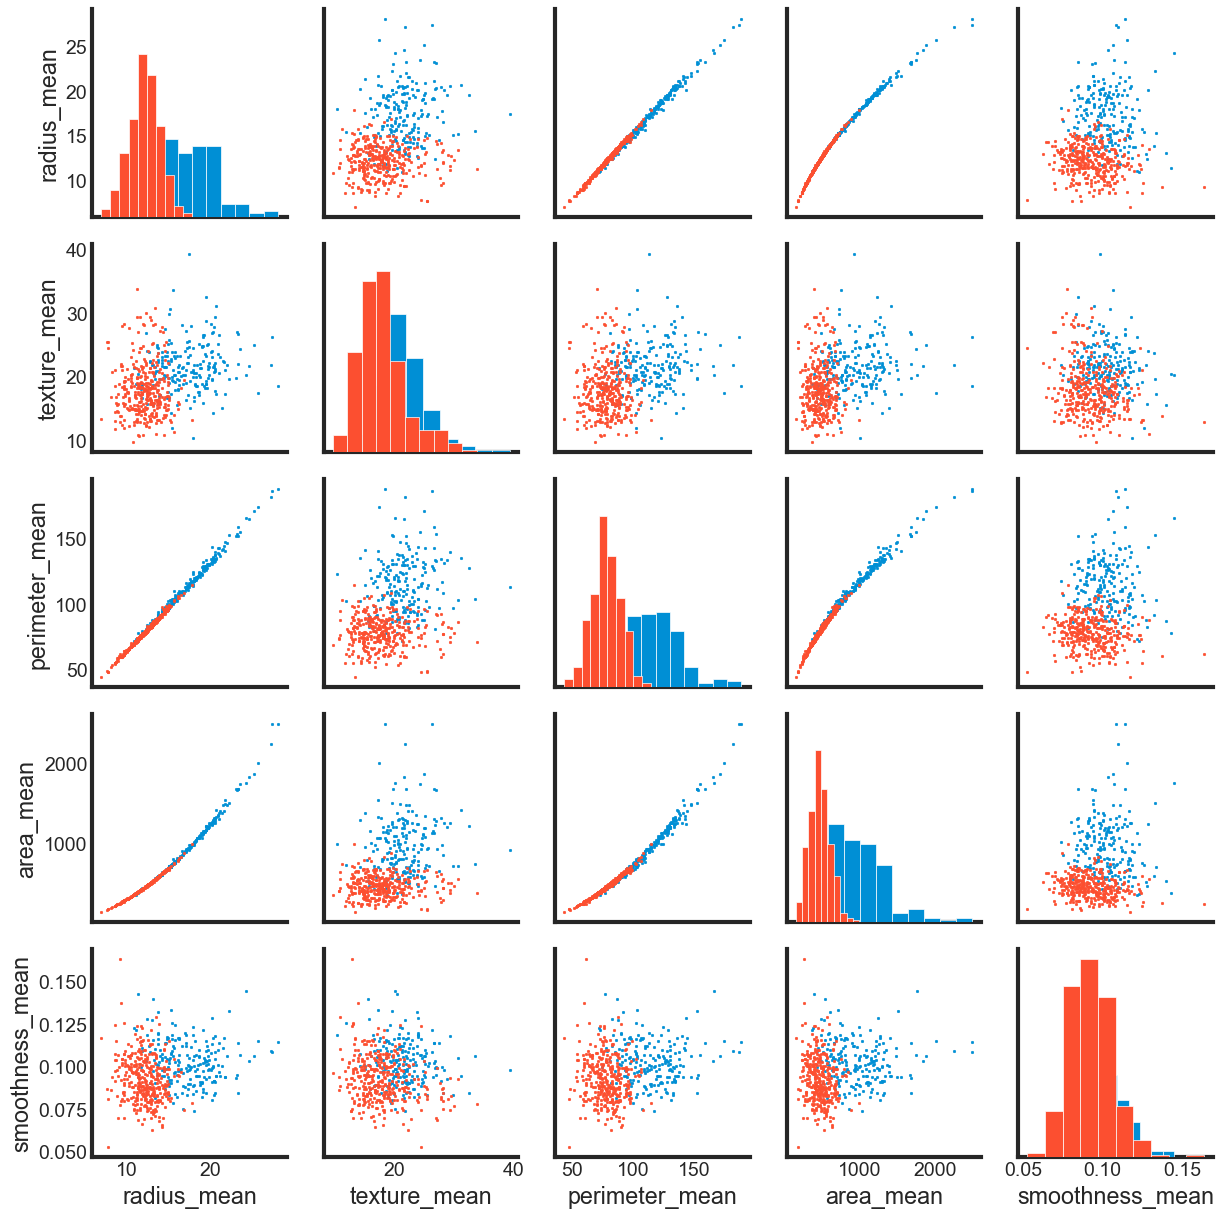

In [35]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('data.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

Part_2 Summary:


-> Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

-> mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

-> In any of the histograms there are no noticeable large outliers that warrants further cleanup.

Part_3: Pre-Processing the data

GOAL : Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.

In [40]:
#load data and essential libraries
from scipy.stats import norm

#visualization
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize']=(8,4)

df =pd.read_csv('data.csv',index_col=False)
df.drop('id',axis=1,inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Label encoding

Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [43]:
#Assign Predictor Variables
array = df.values
X = array[:,1:31]
y = array[:,0]
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [45]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
y = le.fit_transform(y)
y

# Call the transform method of LabelEncorder on two dummy variables
# le.transform (['M', 'B'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.**

Assesing Model Accuracy: Split data into training and test sets

In [46]:
from sklearn.model_selection import train_test_split

#split data into train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one

In [47]:
from sklearn.preprocessing import StandardScaler

#Normalize the data(center around 0 and scale to remove variance)
scaler= StandardScaler()
Xs = scaler.fit_transform(X)


Feature decomposition using Principal Component Analysis (PCA)

In [50]:
from sklearn.decomposition import PCA
#feature extraction
pca= PCA(n_components=10)
fit = pca.fit(Xs)

# print(pca.explained_variance_ratio_)
# print(fit.components_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


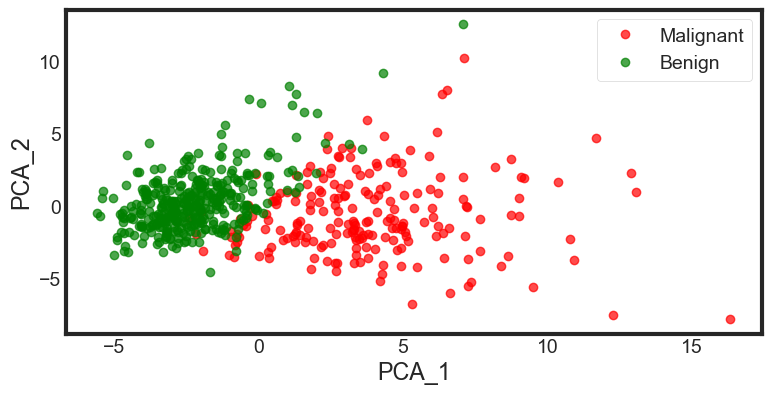

In [51]:
X_pca = pca.transform(Xs)
PCA_df = pd.DataFrame()

PCA_df['PCA_1']= X_pca[:,0]
PCA_df['PCA_2']= X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis=="M"], PCA_df['PCA_2'][df.diagnosis =="M"],'o',alpha=0.7,color='r')
plt.plot(PCA_df['PCA_1'][df.diagnosis=="B"],PCA_df['PCA_2'][df.diagnosis=="B"],'o',alpha=0.7,color='g')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are most spread along the new feature axes.

Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot.

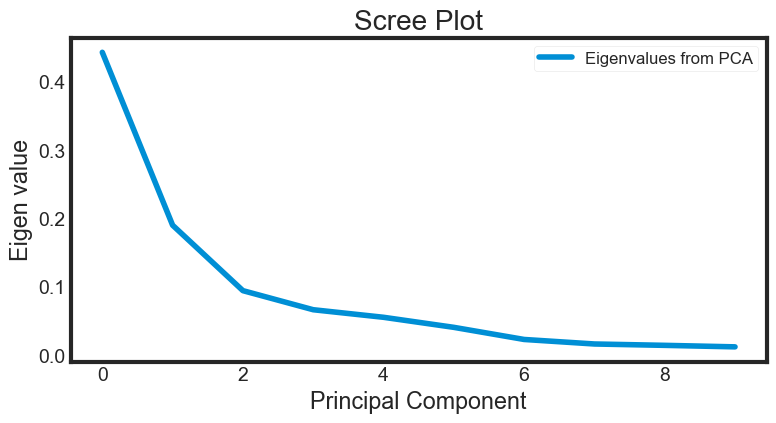

In [55]:
#the amount of variance that each PC explains
var = pca.explained_variance_ratio_

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigen value')

leg= plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=1,fontsize=12)

leg.get_frame().set_alpha(0.4)  
leg.set_draggable(True)
plt.show()

Observation::

The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

Predictive model using Support Vector Machine (SVM)

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

#load libraries for data processing
import pandas as pd
import numpy as np
from scipy.stats import norm

#Supervised Learning
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

#visualization
import seaborn as sns
sns.set_style('white')

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['axes.titlesize']='large'

In [60]:
df = pd.read_csv('breast-cancer.csv',index_col=False)
df.drop(['id'],inplace=True,axis=1)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [61]:
#Assign predictor variables  of ndarray
array = df.values
X=array[:,1:31]   #features
y=array[:,0]

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

#Normalize the data
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Classification with cross-validation:

In [62]:
#devide the record into train test sets
X_train, X_test, y_train, y_test = train_test_split(Xs,y,test_size=0.25,random_state=2, stratify=y)

#Creating a SVM classifier and train it on 70% of the data
clf =SVC(probability=True)
clf.fit(X_train, y_train)
#analyze accuracy of predictions on 30% of the hold out test sample
classifier_score = clf.score(X_test, y_test)
print('\n--> The Classifier Accuracy score is {:03.2f}\n '.format(classifier_score))


--> The Classifier Accuracy score is 0.96
 


To get a better measure of prediction accuracy (which you can use as a proxy for “goodness of fit” of the model), you can successively split the data into folds that you will use for training and testing:

In [63]:
#Get average of 3 Fold cross validation scores using SVC estimator
n_folds =3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\n--> The {}-Fold Cross Validation Accuracy score is {:.2f}\n'.format(n_folds,cv_error))


--> The 3-Fold Cross Validation Accuracy score is 0.97



The above evaluations were based on using the entire set of features. You will now employ the correlation-based feature selection strategy to assess the effect of using 3 features which have the best correlation with the class labels

In [64]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2= make_pipeline(SelectKBest(f_regression,k=3),SVC(probability=True))

scores= cross_val_score(clf2, Xs, y, cv=3)
#get average of 3 fold cross validation scores
n_folds=3
cv_error = np.average(cross_val_score(SVC(), Xs,y, cv=n_folds))
print('\n--> The {}-Fold Cross Validation Accuracy score for this classifier is {:.2f}\n'.format(n_folds,cv_error))


--> The 3-Fold Cross Validation Accuracy score for this classifier is 0.97



In [66]:
print(scores)
avg= (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("-> Average score and uncertainity:(%0.2f +-%0.3f) %%" % avg)

[0.93157895 0.95263158 0.94179894]
-> Average score and uncertainity:(94.20 +-0.496) %


From the above results, you can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features. Feature selection is an important part of the model-building process that you must always pay particular attention to. The details are beyond the scope of this notebook. In the rest of the analysis, you will continue using the entire set of features

Model Accuracy: Receiver Operating Characteristic (ROC) curve:


In [67]:
#confusion matrics helps visualize the performance of a classification model
y_pred = clf.fit(X_train,y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[89  1]
 [ 5 48]]


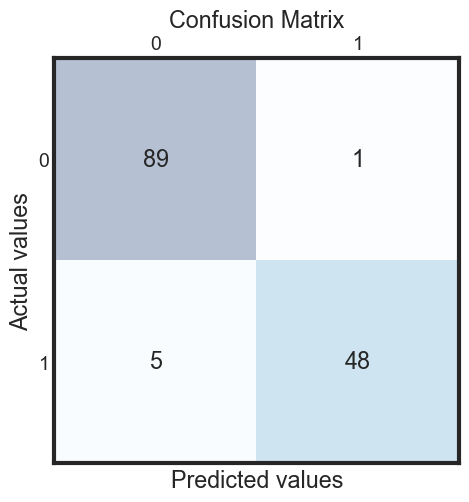

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image,display
fig,ax = plt.subplots(figsize= (5,5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test,y_pred=y_pred))

Observation:

There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).


The classifier made a total of 174 predictions (i.e 143 patients were being tested for the presence breast cancer).

Out of those 143 cases, the classifier predicted "yes" 48 times, and "no" 95 times.
In reality, 53 patients in the sample have the disease, and 107 patients do not.